In [18]:
def lin_model(x: list|tuple, y: list|tuple) -> str:
    ''' Given two lists or tuples of x and y numbers (ints or floats) in a linear relationship, 
        return least-squares best fit as sympy expression.
        >>>lin_model([0, 1, 2, 3], [1, 3, 4, 4])
        x + 3/2
        >>>N(lin_model([2, 3, 5, 7, 9], [4, 5, 7, 10, 15]), 4) # from sympy import N
        1.518x + 0.3049
    '''
    from sympy import Matrix, symbols, ones
    # garbage filters
    assert x and isinstance(x, list|tuple), "input must be lists or tuples of ints or floats"
    assert y and isinstance(y, list|tuple), "input must be lists or tuples of ints or floats"
    bad_values_x, bad_values_y = {}, {}
    for index, value in enumerate(x):
        if not isinstance(value, (int,float)):
            bad_values_x[index] = (value, type(value).__name__)
    for index, value in enumerate(y):
        if not isinstance(value, (int,float)):
            bad_values_y[index] = (value, type(value).__name__)
    assert not (bad_values_x or bad_values_y), ("input must be lists or tuples of ints or floats:\n"
                                                "\t\teach item reads index: (bad value, bad value type)\n"
                                                     f"\t\tx-vector: {bad_values_x}\n"
                                                     f"\t\ty-vector: {bad_values_y}")
    # initialization
    onesV = ones(1, len(x)) # make vector of ones the same length as vector x
    y = Matrix(y)
    M = Matrix([onesV, x]).T
    # the algorithm: linear algebra least-squares optimizer
    # a holds the coefficients of the equation y = a0 + a1 x
    a = (M.T @ M).inv() @ M.T @ y
    # initialize for printing
    x = symbols('x')
    return a[0] + x* a[1]

In [19]:
def test_lin_model(X: list|tuple, Y: list|tuple) -> tuple:
    ''' Given two lists or tuples of x and y numbers (ints or floats) in a linear relationship,
        show graph of scatterplot and best-fit line,
        and return named tuple of expression of best-fit line and test results:
        Homogeneity of Variance: sum of residuals (close to zero?),
        Independence of Errors: durbin-watson test (close to 2?); and
        Normally Distributed Errors: kolmogorov-smirnov test (value greater than 0.05?)
        >>>lin_model([0, 1, 2, 3], [1, 3, 4, 4])
        [Image of scatterplot of recorded x, y values and best-fit line]
        (x + 3/2, 0, 2, 0.74)
    '''
    # initialization
    from sympy import plot, symbols, Matrix, ones
    from numpy import array
    import matplotlib.pyplot as plt
    from statsmodels.stats.stattools import durbin_watson
    from scipy.stats import kstest
    from collections import namedtuple
    lm_results = \
    namedtuple('lm_results', 'expr HoV DW KS')
    
    # implementation
    expr = lin_model(X, Y)

    fig, ax = plt.subplots()
    ax.scatter(X, Y)
    plot(expr, fig=fig, ax=ax)
    
    x, y = symbols('x y')
    # y = recorded values, y_hat = predicted values
    y_hat = lin_model(X, Y).subs(x, Matrix(X))

    # sympy can't interpret scalar + vector
    # so make same-sized vector of 3/2s, then add the two vectors
    y_hat = y_hat.args[1] + y_hat.args[0] * ones(len(y_hat.args[1]), 1)

    residuals = list(y_hat - Matrix(Y))

    # Test 1: homogeneity of variance
    HoV = sum(residuals)
    # Test 2: Independence of Errors
    DW = durbin_watson(residuals)
    # Test 3: Normally distributed residuals
    # Kolmogorov-Smirnov Test
    # coerce residual vector values as np floats
    # extract p-value, round to two digits
    # no need for more because:
    # p-value < 0.05 means NOT normally distributed
    KS = round(float(kstest(array(residuals).astype(float), 'norm').pvalue), 2)

    # return expr, HoV, DW, KS
    expr = f"y = {expr}" # return a formatted string
    return lm_results(expr, HoV, DW, KS)

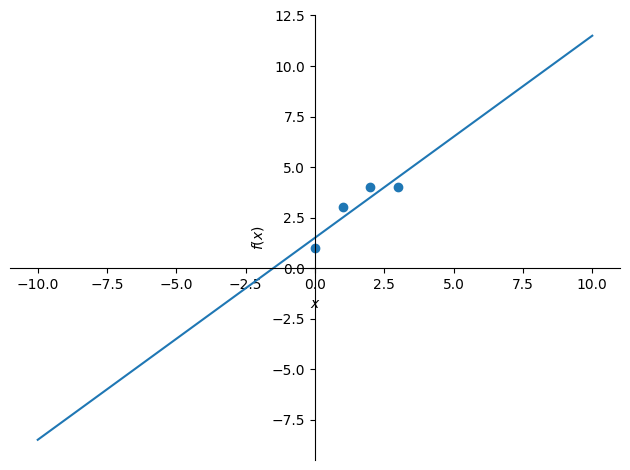

In [15]:
test1 = test_lin_model([0, 1, 2, 3], [1, 3, 4, 4])

In [9]:
test1

lm_results(expr='y = x + 3/2', HoV=0, DW=2, KS=0.74)

In [13]:
test1.expr

'y = x + 3/2'

In [20]:
test_lin_model?

Signature: test_lin_model(X: list | tuple, Y: list | tuple) -> tuple
Docstring:
Given two lists or tuples of x and y numbers (ints or floats) in a linear relationship,
show graph of scatterplot and best-fit line,
and return named tuple of expression of best-fit line and test results:
Homogeneity of Variance: sum of residuals (close to zero?),
Independence of Errors: durbin-watson test (close to 2?); and
Normally Distributed Errors: kolmogorov-smirnov test (value greater than 0.05?)
>>>lin_model([0, 1, 2, 3], [1, 3, 4, 4])
[Image of scatterplot of recorded x, y values and best-fit line]
(x + 3/2, 0, 2, 0.74)
File:      /tmp/ipykernel_49260/197283665.py
Type:      function

In [44]:
from pandas import read_csv
from numpy import log10
starCatalog = read_csv('~/repo/intro_to_programming/datafile/hygdata_v41.zip', compression='zip', index_col=0)

In [46]:
starCatalog.sort_values('dist')
absmag = starCatalog['absmag'][1:].to_list()
dist = log10(starCatalog['dist'][1:]).to_list()

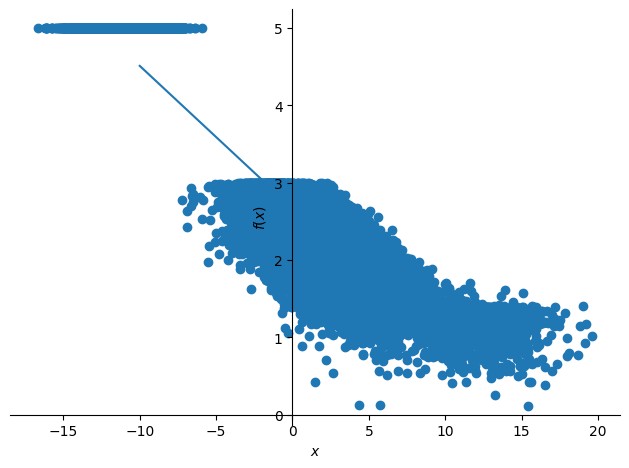

In [47]:
starCorr = test_lin_model(absmag, dist)

In [43]:
starCorr

lm_results(expr='y = 2.66553571639236 - 0.191025507396524*x', HoV=-3.33768146454361e-9, DW=1.97266787712209, KS=0.0)